## Yet another extension of (4.2) Example 2

In [1]:
%run imports.py

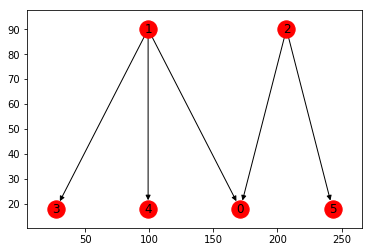

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([
    (1,0),
    (2,0),
    (1,3),
    (1,4),
    (2,5)
])
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

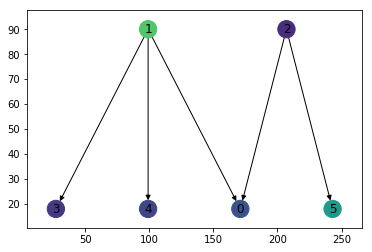

In [3]:
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
#init = np.random.normal(loc=0, scale=4, size=N)
init = np.random.rand(N)
nx.draw_networkx(G, pos=layout, node_color=init, vmin=0, vmax=1)

Simulate simple consensus

In [4]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [5]:
f1 = lambda t,x: np.asarray(L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,10], y0=init)

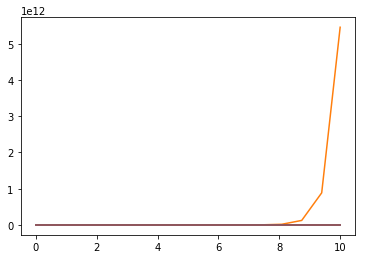

In [6]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [7]:
res1.y[:,-1]

array([ 2.56079824e-01,  5.45505319e+12, -1.30867353e+08,  1.65029340e-01,
        2.02091009e-01,  5.36090662e-01])

### Symmetrization

In [8]:
from scipy.linalg import null_space
from scipy.linalg import solve_lyapunov

In [9]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [10]:
f2 = lambda t,x: eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,10], y0=init)

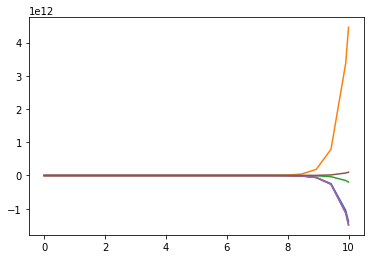

In [11]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

In [12]:
res2.y[:,-1]

array([-1.38724355e+12,  4.46022299e+12, -1.98994894e+11, -1.48674100e+12,
       -1.48674100e+12,  9.94974469e+10])

Create undirected graph from the equivalent Laplacian

In [13]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [14]:
nx.is_connected(eqG)

True

In [15]:
np.sum(eqL, axis=1)

array([-1.05471187e-15,  1.45716772e-15,  1.22124533e-15, -3.67761377e-16,
       -2.49800181e-16, -6.10622664e-16])

In [16]:
eqL

array([[ 0.52364865, -0.65878378, -0.60810811,  0.21959459,  0.21959459,
         0.30405405],
       [-0.65878378,  2.28040541, -0.2027027 , -0.76013514, -0.76013514,
         0.10135135],
       [-0.60810811, -0.2027027 ,  1.35135135,  0.06756757,  0.06756757,
        -0.67567568],
       [ 0.21959459, -0.76013514,  0.06756757,  0.25337838,  0.25337838,
        -0.03378378],
       [ 0.21959459, -0.76013514,  0.06756757,  0.25337838,  0.25337838,
        -0.03378378],
       [ 0.30405405,  0.10135135, -0.67567568, -0.03378378, -0.03378378,
         0.33783784]])

In [17]:
np.diag(eqL)

array([0.52364865, 2.28040541, 1.35135135, 0.25337838, 0.25337838,
       0.33783784])

Final result

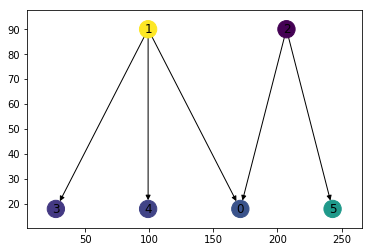

In [18]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout, vmin=0, vmax=1)

In [19]:
np.linalg.matrix_rank(eqL)

2

In [20]:
negG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            negG.add_edge(i,j)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


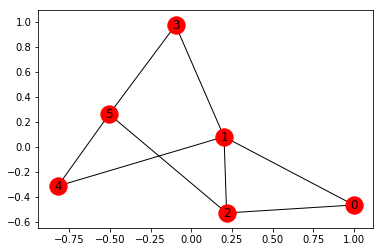

In [21]:
nx.draw_networkx(negG)

In [22]:
posG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            posG.add_edge(i,j)

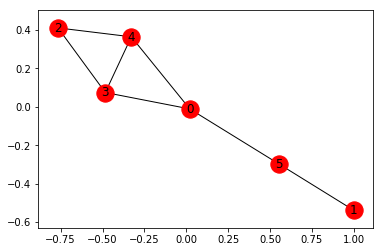

In [23]:
nx.draw_networkx(posG)

In [24]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [25]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [26]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-2.39568980e+00, -1.31595331e+00, -1.27611162e-16, -2.14650015e-02,
        -2.19594595e-01]),
 matrix([[ 8.12044743e-01, -1.73230890e-01, -4.47213595e-01,
           3.32527283e-01,  3.58780473e-16],
         [-1.85000681e-01, -7.05777419e-01, -4.47213595e-01,
          -5.17351895e-01, -4.64039799e-16],
         [-3.79941896e-01,  1.04006551e-01, -4.47213595e-01,
           3.80561155e-01, -7.07106781e-01],
         [-3.79941896e-01,  1.04006551e-01, -4.47213595e-01,
           3.80561155e-01,  7.07106781e-01],
         [ 1.32839731e-01,  6.70995208e-01, -4.47213595e-01,
          -5.76297699e-01, -7.62630944e-16]]))

In [27]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-1.62162162,  0.2027027 ,  0.76013514,  0.76013514, -0.10135135],
        [ 0.2027027 , -0.74324324, -0.06756757, -0.06756757,  0.67567568],
        [ 0.76013514, -0.06756757, -0.47297297, -0.25337838,  0.03378378],
        [ 0.76013514, -0.06756757, -0.25337838, -0.47297297,  0.03378378],
        [-0.10135135,  0.67567568,  0.03378378,  0.03378378, -0.64189189]])